In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
cols = ['Lap','Driver','Laptime','Sec1','Sec2','Sec3','Elo']
laptimes = pd.read_csv('bathurst24.csv',names=cols)
laptimes

,Lap,Driver,Laptime,Sec1,Sec2,Sec3,Elo
0,1,Marco Jonkers,2:08.557,0:43.700,0:57.700,0:27.200,5075
1,2,Marco Jonkers,2:02.032,0:38.700,0:56.100,0:27.200,5075
2,3,Marco Jonkers,2:02.222,0:39.000,0:55.800,0:27.500,5075
3,4,Marco Jonkers,2:02.595,0:39.200,0:55.900,0:27.500,5075
4,5,Marco Jonkers,2:01.785,0:38.900,0:55.800,0:27.000,5075
...,...,...,...,...,...,...,...
689,690,Reno Kööts,2:16.522,0:42.900,1:03.600,0:30.000,5542
690,691,Reno Kööts,2:14.970,0:42.100,1:03.000,0:29.900,5542
691,692,Reno Kööts,2:12.755,0:42.200,1:01.400,0:29.100,5542
692,693,Reno Kööts,2:09.890,0:41.000,1:00.000,0:28.900,5542


In [3]:
def timeConvert(time:str) -> float:
    time_list = time.split(':')
    min_sec = int(time_list[0])*60
    sec_sec = float(time_list[1])
    rettime =min_sec+sec_sec 
    return rettime

newcol = laptimes['Laptime']
newcol = newcol.apply(timeConvert)
laptimes['Laptime'] = newcol

newcol = laptimes['Sec1']
newcol = newcol.apply(timeConvert)
laptimes['Sec1'] = newcol

newcol = laptimes['Sec2']
newcol = newcol.apply(timeConvert)
laptimes['Sec2'] = newcol

newcol = laptimes['Sec3']
newcol = newcol.apply(timeConvert)
laptimes['Sec3'] = newcol

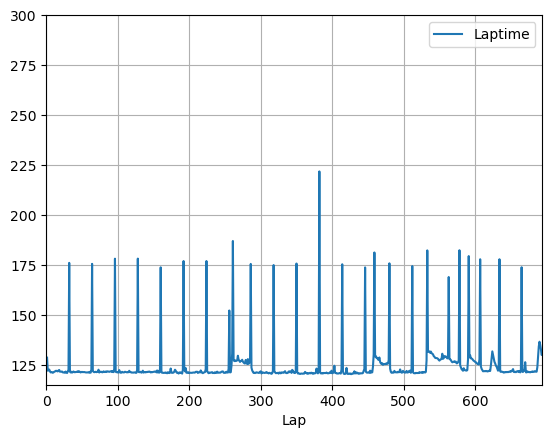

In [89]:
laptimes.plot(kind='line', grid=True,
x="Lap", y="Laptime")
plt.axis([0, 694, 115, 300])
plt.show()

In [8]:
laptimes.describe()

,Lap,Laptime,Sec1,Sec2,Sec3,Elo
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,347.500000,124.534687,40.831844,56.323055,27.382565,4562.301153
std,200.484829,10.837025,10.367929,1.453627,0.644321,912.335036
min,1.000000,120.310000,38.200000,55.100000,26.800000,3202.000000
25%,174.250000,121.048250,38.500000,55.500000,27.000000,3202.000000
50%,347.500000,121.395000,38.600000,55.700000,27.100000,5075.000000
75%,520.750000,122.761500,38.900000,56.200000,27.500000,5164.000000
max,694.000000,221.765000,139.000000,63.600000,30.500000,5542.000000


In [77]:
laptimes_train = laptimes[:63]

In [78]:
laptimes_train

,Lap,Driver,Laptime,Sec1,Sec2,Sec3,Elo
0,1,Marco Jonkers,128.557,43.7,57.7,27.2,5075
1,2,Marco Jonkers,122.032,38.7,56.1,27.2,5075
2,3,Marco Jonkers,122.222,39.0,55.8,27.5,5075
3,4,Marco Jonkers,122.595,39.2,55.9,27.5,5075
4,5,Marco Jonkers,121.785,38.9,55.8,27.0,5075
...,...,...,...,...,...,...,...
58,59,Marco Jonkers,121.187,38.5,55.7,27.0,5075
59,60,Marco Jonkers,121.017,38.6,55.4,27.0,5075
60,61,Marco Jonkers,121.485,38.6,55.6,27.3,5075
61,62,Marco Jonkers,121.022,38.5,55.6,27.0,5075


In [79]:
X = laptimes_train[['Lap']].values
y = laptimes_train[['Laptime']].values
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [93]:
cols = ['Lap','Laptime']
laptimes_pred = pd.DataFrame(columns = cols)
for i in range(64,94):
    X_new = [[i]]
    new_row = {'Lap': i, 'Laptime':model.predict(X_new)} 
    laptimes_pred.loc[len(laptimes_pred)] = new_row
laptimes_pred

,Lap,Laptime
0,64,[[121.89746748591907]]
1,65,[[121.88007683691754]]
2,66,[[121.862686187916]]
3,67,[[121.84529553891446]]
4,68,[[121.82790488991293]]
5,69,[[121.81051424091139]]
6,70,[[121.79312359190985]]
7,71,[[121.77573294290832]]
8,72,[[121.75834229390678]]
9,73,[[121.74095164490525]]


<Figure size 640x480 with 0 Axes>

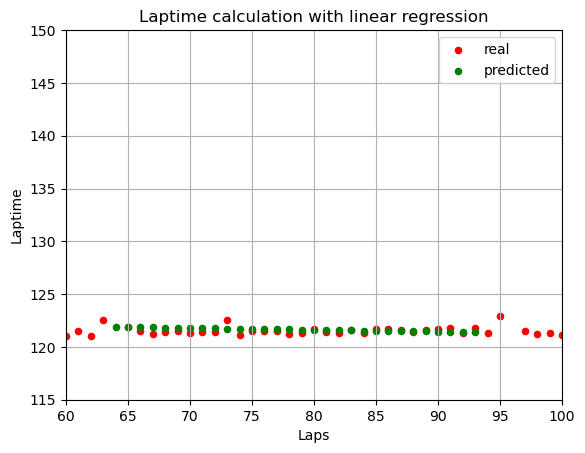

In [94]:
plt.figure()
fig,ax = plt.subplots()
laptimes.plot(kind = 'scatter', grid=True, x="Lap", y="Laptime",color = 'r',label = 'real',ax = ax)
laptimes_pred.plot(kind = 'scatter',grid=True, x="Lap", y="Laptime",color = 'g', label = 'predicted',ax = ax)
plt.xlabel("Laps") 
plt.ylabel("Laptime") 
plt.title("Laptime calculation with linear regression") 
plt.axis([60, 100, 115, 150])
plt.legend() 
plt.show()

In [134]:
laptimes_train2 = laptimes[382:413]
laptimes_train2

,Lap,Driver,Laptime,Sec1,Sec2,Sec3,Elo
382,383,Øystein Brennum,121.150,38.7,55.5,26.9,5164
383,384,Øystein Brennum,120.685,38.5,55.3,26.9,5164
384,385,Øystein Brennum,120.667,38.6,55.3,26.8,5164
385,386,Øystein Brennum,120.860,38.6,55.3,26.9,5164
386,387,Øystein Brennum,120.630,38.4,55.2,27.0,5164
387,388,Øystein Brennum,120.892,38.5,55.4,27.0,5164
388,389,Øystein Brennum,120.860,38.4,55.4,27.1,5164
389,390,Øystein Brennum,120.835,38.4,55.5,27.0,5164
390,391,Øystein Brennum,120.862,38.5,55.5,26.9,5164
391,392,Øystein Brennum,121.085,38.5,55.3,27.3,5164


In [135]:
X = laptimes_train2[['Lap']].values
y = laptimes_train2[['Laptime']].values
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [136]:
cols = ['Lap','Laptime']
laptimes_pred2 = pd.DataFrame(columns = cols)
laptimes_pred2 = laptimes_pred2.iloc[0:0]
len(laptimes_pred2)
for i in range(382,414):
    X_new = [[i]]
    new_row2 = {'Lap': i, 'Laptime':model.predict(X_new)}
    #print(new_row2)
    laptimes_pred2.loc[len(laptimes_pred2)] = new_row2
    len(laptimes_pred2)
laptimes_pred2
#len(laptimes_pred2)

,Lap,Laptime
0,382,[[120.80667096774192]]
1,383,[[120.82243749999999]]
2,384,[[120.83820403225805]]
3,385,[[120.85397056451612]]
4,386,[[120.86973709677417]]
5,387,[[120.88550362903224]]
6,388,[[120.90127016129031]]
7,389,[[120.91703669354837]]
8,390,[[120.93280322580644]]
9,391,[[120.94856975806451]]


<Figure size 640x480 with 0 Axes>

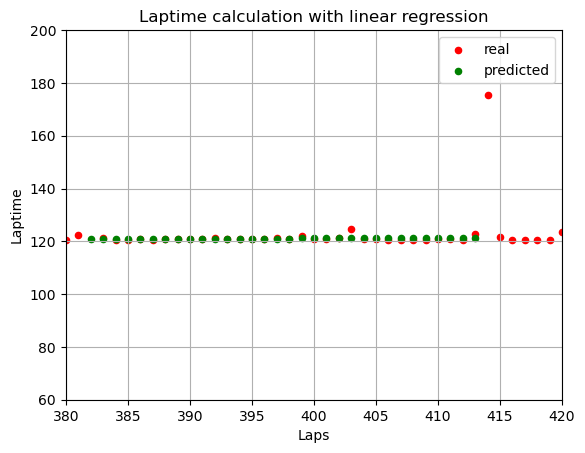

In [138]:
plt.figure()
fig,ax = plt.subplots()
laptimes.plot(kind = 'scatter', grid=True, x="Lap", y="Laptime",color = 'r',label = 'real',ax = ax)
laptimes_pred2.plot(kind = 'scatter',grid=True, x="Lap", y="Laptime",color = 'g', label = 'predicted',ax = ax)
plt.xlabel("Laps") 
plt.ylabel("Laptime") 
plt.title("Laptime calculation with linear regression") 
plt.axis([380, 420, 60, 200])
plt.legend() 
plt.show()